In [1]:
import os
import sys
import time
import warnings
warnings.filterwarnings('ignore')
# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white")
import pandas as pd
pd.set_option("display.max_columns", 30)
import numpy as np
from datetime import datetime
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from prince import mca

In [2]:
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
os.chdir(directory_path)
os.getcwd()

'/Users/iairlinker/Documents/repos/flight_delays_challenge'

In [3]:
def create_variables(data):
    # create the variable of number of flights in origin by date operated and merge it with the database
    aux = data.groupby(['fecha_operacion'])['Ori-O'].count().reset_index().sort_values(by='Ori-O')
    aux.rename(columns={'Ori-O':'NVuelos-Ori-O'}, inplace=True)
    data = pd.merge(data, aux, on = ['fecha_operacion'], how='left')

    # create the variable of number of flights in origin by date scheduled and merge it with the database
    aux = data.groupby(['fecha_operacion'])['Ori-I'].count().reset_index().sort_values(by='Ori-I')
    aux.rename(columns={'Ori-I':'NVuelos-Ori-I'}, inplace=True)
    data = pd.merge(data, aux, on = ['fecha_operacion'], how='left')

    # create the variable of number of flights in destiny scheduled by date and airline scheduled
    aux = data.groupby(['fecha_operacion','Emp-I'])['Ori-I'].count().reset_index().sort_values(by='Ori-I')
    aux.rename(columns={'Ori-I':'Nvuelos-Fecha-Emp-I'}, inplace=True)
    data = pd.merge(data, aux, on = ['fecha_operacion','Emp-I'], how='left')

    # create the variable of number of flights in by date and airline who operated it
    aux = data.groupby(['fecha_operacion','Emp-O'])['Ori-O'].count().reset_index().sort_values(by='Ori-O')
    aux.rename(columns={'Ori-O':'Nvuelos-Fecha-Emp-O'}, inplace=True)
    data = pd.merge(data, aux, on = ['fecha_operacion','Emp-O'], how='left')

    # create the variable of number of flights in operated destiny by date of operation and airline who operated it
    aux = data.groupby(['fecha_operacion','Emp-O','Des-O'])['Ori-O'].count().reset_index().sort_values(by='Ori-O')
    aux.rename(columns={'Ori-O':'Nvuelos-Fecha-Emp-Des-O'}, inplace=True)
    data = pd.merge(data, aux, on = ['fecha_operacion','Emp-O','Des-O'], how='left')

    # create the variable of number of flights in destiny scheduled by date scheduled and airline scheduled
    aux = data.groupby(['fecha_operacion','Emp-I','Des-I'])['Ori-I'].count().reset_index().sort_values(by='Ori-I')
    aux.rename(columns={'Ori-I':'Nvuelos-Fecha-Emp-Des-I'}, inplace=True)
    data = pd.merge(data, aux, on = ['fecha_operacion','Emp-I','Des-I'], how='left')

    # Change in the code of the flight
    data[['Vlo-I_cambio']] = 0
    data.loc[data[data['Vlo-I'] != data['Vlo-O']].index,'Vlo-I_cambio'] = 1
    
    return data

def get_na(df):
    qsna=df.shape[0]-df.isnull().sum(axis=0)
    qna=df.isnull().sum(axis=0)
    ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
    aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
    na=pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %',ascending=False)

In [4]:
start_notebook = time.time()

In [5]:
# Loading the joined dataset between flights and Airport database
path = os.getcwd() + '/data/processed/database.csv'
df = pd.read_csv(path, sep=',')
df = create_variables(data = df)
transform_df= df.drop(columns=['Fecha-O','Fecha-I','AÑO','Des-I','Vlo-I','Vlo-O','Ori-O','Ori-I',
                               'IATA Code','Airport Name','Country','City/Town','ICAO Code','SIGLADES','SIGLAORI','Lat','Long','distance_to_destiny',
                               'OPERA','Emp-I','dif_min','fecha_operacion','temporada_alta',
                               # 'NVuelos-Ori-I','Nvuelos-Fecha-Emp-I','Nvuelos-Fecha-Emp-Des-I',
                              ])
print(transform_df.shape)
transform_df.head(2)

(68206, 15)


,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,atraso_15,periodo_dia,NVuelos-Ori-O,NVuelos-Ori-I,Nvuelos-Fecha-Emp-I,Nvuelos-Fecha-Emp-O,Nvuelos-Fecha-Emp-Des-O,Nvuelos-Fecha-Emp-Des-I,Vlo-I_cambio
0,KMIA,AAL,1,1,Domingo,I,0,night,168,168,3,3,2,2,0
1,KMIA,AAL,2,1,Lunes,I,0,night,199,199,3,3,2,2,0


In [6]:
transformer = make_column_transformer(
    (OneHotEncoder(drop='first',sparse=False), ['Des-O','Emp-O','TIPOVUELO','periodo_dia','DIANOM','MES','DIA']),
    remainder='passthrough')

transformed = transformer.fit_transform(transform_df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
transformed_df.head()

,onehotencoder__x0_EGLL,onehotencoder__x0_EGYP,onehotencoder__x0_KATL,onehotencoder__x0_KDFW,onehotencoder__x0_KIAD,onehotencoder__x0_KIAH,onehotencoder__x0_KJFK,onehotencoder__x0_KLAX,onehotencoder__x0_KMCO,onehotencoder__x0_KMIA,onehotencoder__x0_LEMD,onehotencoder__x0_LFPG,onehotencoder__x0_LIRF,onehotencoder__x0_MDPC,onehotencoder__x0_MMMX,...,onehotencoder__x6_25,onehotencoder__x6_26,onehotencoder__x6_27,onehotencoder__x6_28,onehotencoder__x6_29,onehotencoder__x6_30,onehotencoder__x6_31,atraso_15,NVuelos-Ori-O,NVuelos-Ori-I,Nvuelos-Fecha-Emp-I,Nvuelos-Fecha-Emp-O,Nvuelos-Fecha-Emp-Des-O,Nvuelos-Fecha-Emp-Des-I,Vlo-I_cambio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,168.0,3.0,3.0,2.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.0,199.0,3.0,3.0,2.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,192.0,3.0,3.0,2.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,194.0,3.0,3.0,2.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,198.0,3.0,3.0,2.0,2.0,0.0


In [7]:
path = os.getcwd() + '/data/interim/model_data_ohe.csv' 
transformed_df.to_csv(path,
          sep=',',
          index = False
         )

### Deleting columns

In [8]:
# Loading the joined dataset between flights and Airport database

# Loading the joined dataset between flights and Airport database
path = os.getcwd() + '/data/processed/database.csv'
df = pd.read_csv(path, sep=',')
df = create_variables(data = df)
transform_df= df.drop(columns=['Fecha-O','Fecha-I','AÑO','Des-I','Vlo-I','Vlo-O','Ori-O','Ori-I',
                               'IATA Code','Airport Name','Country','City/Town','ICAO Code','SIGLADES','SIGLAORI','Lat','Long','distance_to_destiny',
                               'OPERA','Emp-I','dif_min','fecha_operacion','temporada_alta',
                               'Des-O','DIA', 'MES', 'DIANOM'
                               # 'NVuelos-Ori-I','Nvuelos-Fecha-Emp-I','Nvuelos-Fecha-Emp-Des-I',
                              ])
transformer = make_column_transformer(
    (OneHotEncoder(drop='first',sparse=False), ['Emp-O','TIPOVUELO','periodo_dia']),
    remainder='passthrough')

transformed = transformer.fit_transform(transform_df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
path = os.getcwd() + '/data/interim/model_data.csv' 
transformed_df.to_csv(path,
          sep=',',
          index = False
         )
transformed_df.head()

,onehotencoder__x0_56R,onehotencoder__x0_AAL,onehotencoder__x0_ACA,onehotencoder__x0_AFR,onehotencoder__x0_AMX,onehotencoder__x0_ARG,onehotencoder__x0_AUT,onehotencoder__x0_AVA,onehotencoder__x0_AZA,onehotencoder__x0_BAW,onehotencoder__x0_CMP,onehotencoder__x0_DAL,onehotencoder__x0_DSM,onehotencoder__x0_GLO,onehotencoder__x0_IBE,...,onehotencoder__x0_SKU,onehotencoder__x0_TAM,onehotencoder__x0_TPU,onehotencoder__x0_UAL,onehotencoder__x1_N,onehotencoder__x2_morning,onehotencoder__x2_night,atraso_15,NVuelos-Ori-O,NVuelos-Ori-I,Nvuelos-Fecha-Emp-I,Nvuelos-Fecha-Emp-O,Nvuelos-Fecha-Emp-Des-O,Nvuelos-Fecha-Emp-Des-I,Vlo-I_cambio
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,168.0,168.0,3.0,3.0,2.0,2.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,199.0,199.0,3.0,3.0,2.0,2.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192.0,192.0,3.0,3.0,2.0,2.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,194.0,194.0,3.0,3.0,2.0,2.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198.0,198.0,3.0,3.0,2.0,2.0,0.0


## MCA

I will perform

In [9]:
# Loading the joined dataset between flights and Airport database
path = os.getcwd() + '/data/processed/database.csv'
df = pd.read_csv(path, sep=',')
df = create_variables(data = df)
transform_df= df.drop(columns=['Fecha-O','Fecha-I','AÑO','Des-I','Vlo-I','Vlo-O','Ori-O','Ori-I','OPERA','Emp-I','dif_min','fecha_operacion','temporada_alta',
                               'IATA Code','Airport Name','Country','City/Town','ICAO Code','SIGLADES','SIGLAORI','Lat','Long','distance_to_destiny',
                                'atraso_15'
                               # 'Des-O','DIA', 'MES', 'DIANOM'
                               # 'NVuelos-Ori-I','Nvuelos-Fecha-Emp-I','Nvuelos-Fecha-Emp-Des-I',
                              ])
print(transform_df.shape)
transform_df.head(2)

(68206, 14)


,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,periodo_dia,NVuelos-Ori-O,NVuelos-Ori-I,Nvuelos-Fecha-Emp-I,Nvuelos-Fecha-Emp-O,Nvuelos-Fecha-Emp-Des-O,Nvuelos-Fecha-Emp-Des-I,Vlo-I_cambio
0,KMIA,AAL,1,1,Domingo,I,night,168,168,3,3,2,2,0
1,KMIA,AAL,2,1,Lunes,I,night,199,199,3,3,2,2,0


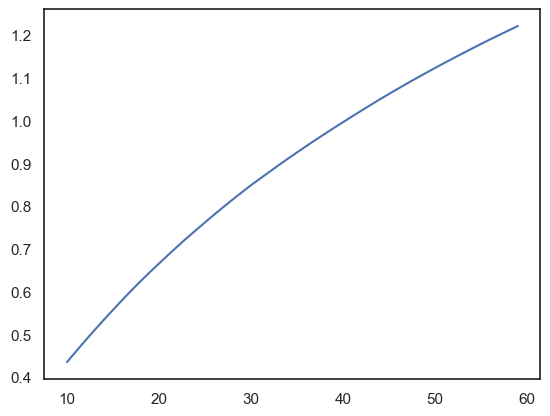

In [14]:
results = []
n = []
for n_comp in range(10,60):
    model = mca.MCA(
        n_components=n_comp,
        n_iter=100,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
    )
    mca_data = model.fit(transform_df)
    mca_x = mca_data.transform(transform_df)
    results.append(model.total_inertia_)
    n.append(n_comp)
plt.plot(n,results);

In [11]:
model = mca.MCA(
    n_components=25,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
mca_data = model.fit(transform_df)
mca_x = mca_data.transform(transform_df)
path = os.getcwd() + '/data/interim/model_data_mca.csv' 
mca_x.to_csv(path,
          sep=',',
          index = False
         )